In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/cs-training.csv')
df.shape

(150000, 12)

In [4]:
df = df.fillna(df.mean(), axis=0)

In [5]:
df[df.MonthlyIncome > 800000].shape

(5, 12)

In [6]:
def remove_outliers(df, times_std, cols):
    for c in cols:
        df = df[np.abs(df[c] - df[c].mean()) <= (times_std * df[c].std())]
    return df

In [7]:
def remove_outliers_and_print(df, times_std, col):
    for c in col:
        df = remove_outliers(df, times_std, [c])
        plt.scatter(df[df.columns[0]], df[c])
        title = str(c) + ' stripped of outliers with a deviaton of more than ' + str(times_std) + ' times the standard deviation'
        plt.title(title)
        plt.xlabel('id')
        plt.ylabel(c)
    return df

In [8]:
df_proc = df

(149954, 12)

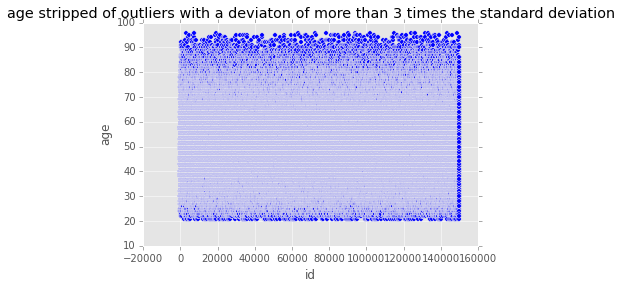

In [9]:
df_proc = remove_outliers_and_print(df_proc, 3, ['age'])
df_proc.shape

(149799, 12)

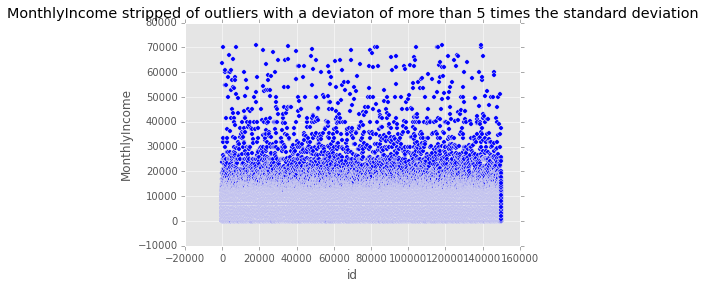

In [10]:
df_proc = remove_outliers_and_print(df_proc, 5, ['MonthlyIncome'])
df_proc.shape

(149797, 12)

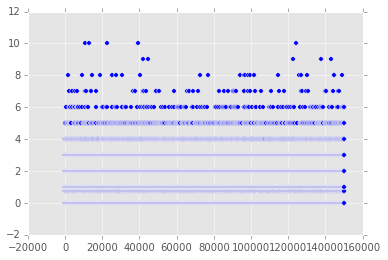

In [11]:
df_proc = df_proc[df_proc.NumberOfDependents <= 10]
plt.scatter(df_proc['Unnamed: 0'], df_proc.NumberOfDependents)
df_proc.shape

(149758, 12)

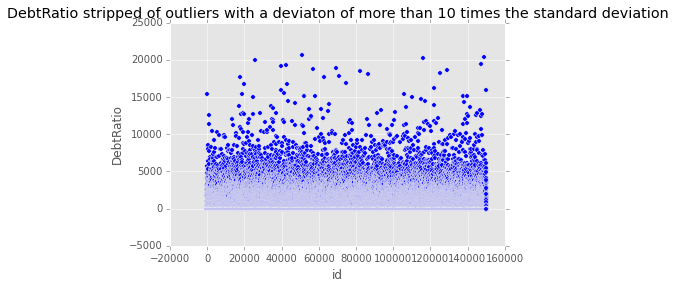

In [12]:
df_proc = remove_outliers_and_print(df_proc, 10, ['DebtRatio'])
df_proc.shape

(149741, 12)

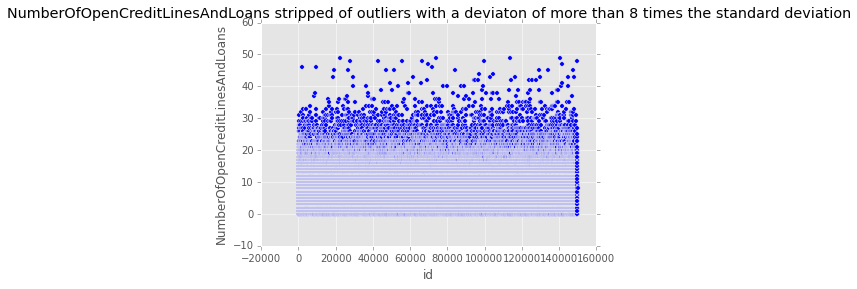

In [13]:
df_proc = remove_outliers_and_print(df_proc, 8, ['NumberOfOpenCreditLinesAndLoans'])
df_proc.shape

(149693, 12)

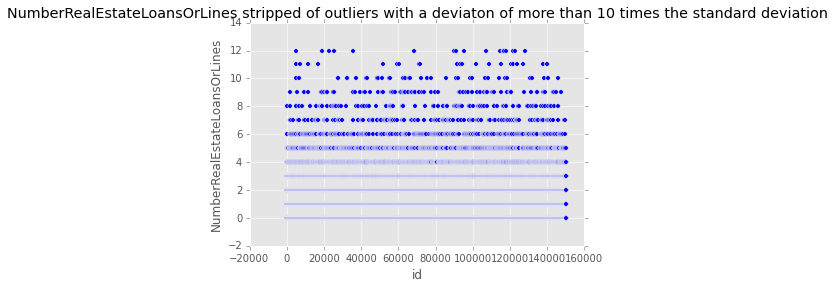

In [14]:
df_proc = remove_outliers_and_print(df_proc, 10, ['NumberRealEstateLoansOrLines'])
df_proc.shape

(149595, 12)

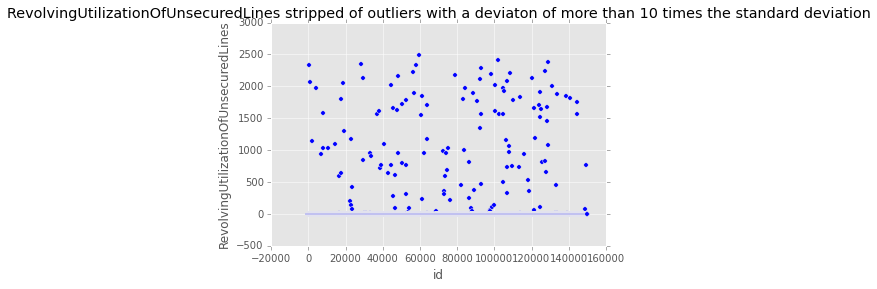

In [15]:
df_proc = remove_outliers_and_print(df_proc, 10, ['RevolvingUtilizationOfUnsecuredLines'])
df_proc.shape

In [16]:
print df_proc[df_proc['SeriousDlqin2yrs'] == 0].shape[0] + df_proc[df_proc['SeriousDlqin2yrs'] == 1].shape[0]
print df_proc.shape[0]

149595
149595


In [17]:
df = df.drop('Unnamed: 0', axis = 1)
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.000000
1,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.000000
2,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.000000
3,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.000000
4,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.000000
5,0,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.000000
6,0,0.305682,57,0,5710.000000,6670.221237,8,0,3,0,0.000000
7,0,0.754464,39,0,0.209940,3500.000000,8,0,0,0,0.000000
8,0,0.116951,27,0,46.000000,6670.221237,2,0,0,0,0.757222
9,0,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.000000


In [20]:
df_proc = df_proc.drop('Unnamed: 0', axis=1)
df_proc.to_csv('./data/cs-train_clean.csv')

In [19]:
df_proc.dropna().shape

(149595, 12)